In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
import cartopy.crs as ccrs

In [3]:
path_Inventario = './invent2.csv'

In [4]:
df = pd.read_csv(path_Inventario, engine='python', sep='\t', delimiter=';')

In [5]:
df.columns

Index(['RegistroID', 'Importado', 'Temporario', 'Removido',
       'ImportadoRepetido', 'BaciaCodigo', 'SubBaciaCodigo', 'RioCodigo',
       'EstadoCodigo', 'MunicipioCodigo', 'ResponsavelCodigo',
       'ResponsavelUnidade', 'ResponsavelJurisdicao', 'OperadoraCodigo',
       'OperadoraUnidade', 'OperadoraSubUnidade', 'TipoEstacao', 'Codigo',
       'Nome', 'CodigoAdicional', 'Latitude', 'Longitude', 'Altitude',
       'AreaDrenagem', 'TipoEstacaoEscala', 'TipoEstacaoRegistradorNivel',
       'TipoEstacaoDescLiquida', 'TipoEstacaoSedimentos',
       'TipoEstacaoQualAgua', 'TipoEstacaoPluviometro',
       'TipoEstacaoRegistradorChuva', 'TipoEstacaoTanqueEvapo',
       'TipoEstacaoClimatologica', 'TipoEstacaoPiezometria',
       'TipoEstacaoTelemetrica', 'PeriodoEscalaInicio', 'PeriodoEscalaFim',
       'PeriodoRegistradorNivelInicio', 'PeriodoRegistradorNivelFim',
       'PeriodoDescLiquidaInicio', 'PeriodoDescLiquidaFim',
       'PeriodoSedimentosInicio', 'PeriodoSedimentosFim',
      

In [6]:
df['Latitude'].notnull().count()

36443

In [7]:
df['Longitude'].notnull().count()

36443

In [8]:
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(lambda x: x.str.replace(',', '.'))

In [9]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

In [10]:
df[['Longitude', 'Latitude']][0:10]

,Longitude,Latitude
0,-73.0833,-13.6500
1,-73.9833,-13.0167
2,-73.3667,-13.6500
3,-73.8333,-13.4333
4,-73.9500,-13.6500
5,-73.7333,-13.8833
6,-73.6167,-13.2167
7,-73.5333,-13.7500
8,-73.3667,-13.5167
9,-73.3500,-13.7333


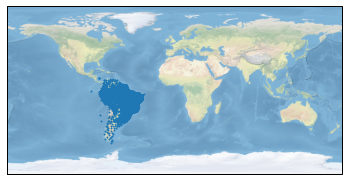

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
extents = [-180, 180, -90,90]
ax.scatter(df['Longitude'][:], df['Latitude'][:], s=1)

ax.set_extent(extents)



In [52]:
def display_stations2(lon, lat):
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    extents = [lon[0], lon[1], lat[0], lat[1]]
    print(extents)
    ax.scatter(df['Longitude'][:], df['Latitude'][:], s=1)

    ax.set_extent(extents)
    ax.plot()

In [56]:
lon = ipywidgets.IntRangeSlider(min=-180, max=180, continuous_update=False)
lat = ipywidgets.IntRangeSlider(min=-90, max=90, continuous_update=False)
ui = ipywidgets.VBox([lon, lat])

In [57]:
out2 = ipywidgets.interactive_output(display_stations2, {'lon': lon,'lat': lat})

In [58]:
display(ui, out2)

Output(outputs=({'output_type': 'stream', 'text': '[-90, 90, -45, 45]\n', 'name': 'stdout'}, {'output_type': '…